## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK [11] : [Algoritma Densitas dan Asosiasi] </div>

#### <div align="center"> Semester Genap 2022/2023 </div>

In [1]:
# Run this code when you restart the machine
# Fill in with YOUR name and NIM
import datetime
import uuid

myName = "Gempar Bambang Godata"
myNIM = "00000056133"

myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Gempar Bambang Godata
NIM: 		00000056133
Start: 		2023-05-14 20:14:06.953325
Device ID: 	34c29a47-f259-11ed-95a2-8f0b15a9c6b6


### Deskripsi Singkat Dataset:

Dataset pertama yaitu Student Alcohol Consumption digunakan untuk DBSCAN algorithm yaitu untuk clustering kebiasaan siswa konsumsi alkohol dari quality of family relationships dan weekend alcohol consumption.

Dataset kedua yaitu Grocery Store Data Set digunakan untuk Association Learning – Apriori Algorithm dan FP Growth Algorithm yang mana dataset tersebut terdiri dari 11 jenis items antara lain JAM, MAGGI, SUGAR, COFFEE, CHEESE, TEA, BOURNVITA, CORNFLAKES, BREAD, BISCUIT, dan MILK.


---

### Dataset yang diambil dari repositori:

1. Student Alcohol Consumption – sumber : https://www.kaggle.com/datasets/uciml/student-alcohol-consumption
2. Grocery Store Data Set – sumber : https://www.kaggle.com/datasets/shazadudwadia/supermarket

### Hasil kerja
<h1 style="background-color:lightblue" > 1. Modul </h1>

### <u> Density Algorithm : DBSCAN </u>

#### Import libraries

In [3]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
  Using cached opencv_python-4.7.0.72-cp37-abi3-win_amd64.whl (38.2 MB)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import DBSCAN

#### Define a function to generate clusters

In [5]:
def cluster_gen(n_clusters, pts_minmax=(10,100), x_mult=(1, 4), y_mult=(1, 3),
               x_off=(0, 50), y_off=(0, 50)):
    
    # n_clusters = number of clusters to generate
    # pts_minmax = range of number of points per cluster 
    # x_mult = range of multiplier to modify the size of cluster in the x-direction
    # y_mult = range of multiplier to modify the size of cluster in the x-direction
    # x_off = range of cluster position offset in the x-direction
    # y_off = range of cluster position offset in the y-direction
    
    # Initialize some empty lists to receive cluster member positions
    clusters_x = []
    clusters_y = []
    # Genereate random values given parameter ranges
    n_points = np.random.randint(pts_minmax[0], pts_minmax[1], n_clusters)
    x_multipliers = np.random.randint(x_mult[0], x_mult[1], n_clusters)
    y_multipliers = np.random.randint(y_mult[0], y_mult[1], n_clusters)
    x_offsets = np.random.randint(x_off[0], x_off[1], n_clusters)
    y_offsets = np.random.randint(y_off[0], y_off[1], n_clusters)
     
    # Generate random clusters given parameter values
    for idx, npts in enumerate(n_points):
        
        xpts = np.random.randn(npts) * x_multipliers[idx] + x_offsets[idx]
        ypts = np.random.randn(npts) * y_multipliers[idx] + y_offsets[idx]
        clusters_x.append(xpts)
        clusters_y.append(ypts)
    
    # Return cluster positions
    return clusters_x, clusters_y

#### Generate some clusters

In [6]:
n_clusters = 50
clusters_x, clusters_y = cluster_gen(n_clusters)

#### Convert to a single dataset in OpenCV format

In [7]:
data = np.float32((np.concatenate(clusters_x), 
                   np.concatenate(clusters_y))).transpose()

#### Define max_distance (eps parameter in DBSCAN)

In [8]:
max_distance = 1
db = DBSCAN(eps=max_distance, min_samples=10).fit(data)

#### Extract a mask of core cluster members

In [9]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

#### Extract labels (-1 is used for outliers) 

In [10]:
labels = db.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
unique_labels = set(labels)

#### Plot the result

Text(0.5, 1.0, 'Original Data')

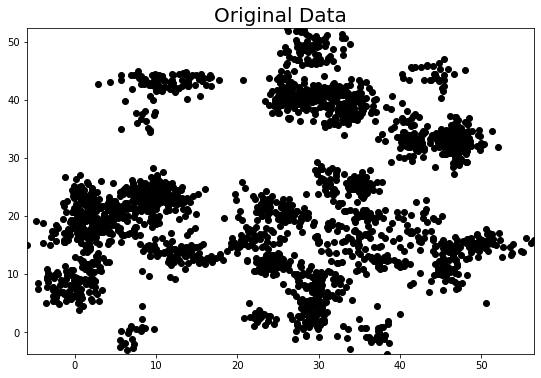

In [15]:
min_x = np.min(data[:, 0])
max_x = np.max(data[:, 0])
min_y = np.min(data[:, 1])
max_y = np.max(data[:, 1])

fig = plt.figure(figsize=(20,6))
plt.subplot(121)
plt.plot(data[:,0], data[:,1], 'ko')
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)
plt.title('Original Data', fontsize = 20)

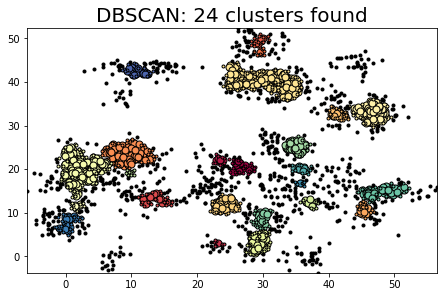

In [19]:
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = data[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=7)

    xy = data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=3)
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)
plt.title('DBSCAN: %d clusters found' % n_clusters, fontsize = 20)
fig.tight_layout()
plt.subplots_adjust(left=0.03, right=0.98, top=0.9, bottom=0.05)

#### Import libraries

In [20]:
import numpy as np
import pandas as pd

import os
#print(os.listdir("../input"))

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

#### Explore data

In [22]:
df = pd.read_csv('Mall_Customers (2).csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [24]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

#### Find insight between male and female

<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

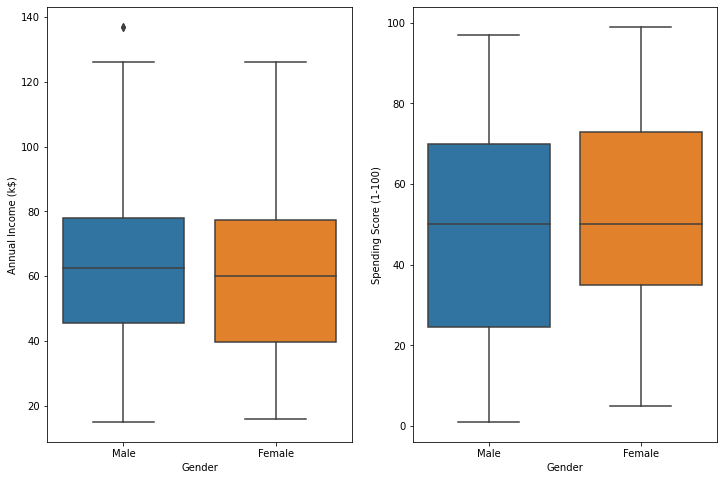

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12,8))

sns.boxplot(x="Gender", y="Annual Income (k$)", data=df, orient='v', ax=axes[0])
sns.boxplot(x="Gender", y="Spending Score (1-100)", data=df, orient='v', ax=axes[1])

#### Grouping data with 'female' because from graph above, looks like female spend more than male

In [26]:
df_group_one = df[['Gender', 'Annual Income (k$)', 'Spending Score (1-100)']]
df_group_one.groupby(['Gender'], as_index=False).mean()

,Gender,Annual Income (k$),Spending Score (1-100)
0,Female,59.250000,51.526786
1,Male,62.227273,48.511364


In [27]:
df_female = df[df['Gender'] == "Female"]
print(df_female.shape)
df_female.head()

(112, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6


In [28]:
Percentage = (df_female.shape[0]/df.shape[0])*100
print('Female Percentage: ', round(Percentage), '%')

Female Percentage:  56 %


#### Compute DBSCAN

In [29]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler

Clus_dataSet = df_female[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = np.array(Clus_dataSet, dtype=np.float64)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.5, min_samples=4).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df_female['Clus_Db']=labels

realClusterNum = len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

# A sample of clusters
print(df_female[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Clus_Db']].head())

# number of labels
print("number of labels: ", set(labels))

   Age  Annual Income (k$)  Spending Score (1-100)  Clus_Db
2   20                  16                       6       -1
3   23                  16                      77        0
4   31                  17                      40       -1
5   22                  17                      76        0
6   35                  18                       6       -1
number of labels:  {0, 1, 2, 3, -1}


#### Visualize the data

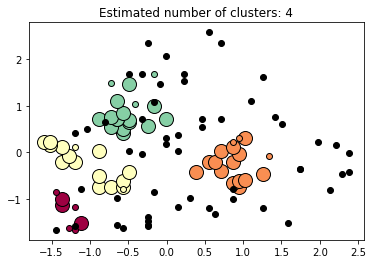

number of noise(s):  54


In [30]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
         for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
        
    class_member_mask = (labels == k)
    
    xy = Clus_dataSet[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
            markeredgecolor='k', markersize=14)
    
    xy = Clus_dataSet[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
            markeredgecolor='k', markersize=6)
    
plt.title('Estimated number of clusters: %d' % realClusterNum)
plt.show()

n_noise_ = list(labels).count(-1)
print('number of noise(s): ', n_noise_)

In [31]:
for clust_number in set(labels):
    clust_set = df_female[df_female.Clus_Db == clust_number]
    if clust_number != -1:
        print("Cluster " + str(clust_number) +', Avg Age: ' + str(round(np.mean(clust_set.Age)))+\
              ', Avg Income: ' + str(round(np.mean(clust_set['Annual Income (k$)'])))+\
              ', Avg Spending: ' + str(round(np.mean(clust_set['Spending Score (1-100)'])))+\
              ', Count: ' + str(np.count_nonzero(clust_set.index)))

Cluster 0, Avg Age: 22, Avg Income: 26, Avg Spending: 78, Count: 7
Cluster 1, Avg Age: 49, Avg Income: 54, Avg Spending: 50, Count: 17
Cluster 2, Avg Age: 25, Avg Income: 52, Avg Spending: 50, Count: 16
Cluster 3, Avg Age: 32, Avg Income: 82, Avg Spending: 82, Count: 18


### Association Learning – Apriori Algorithm

#### Install MLxtend

In [32]:
pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable



#### Generating Frequent Itemset

In [33]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

#### Transform the dataset into the right format via the TransactionEncoder

In [34]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


#### Set the items and itemsets with at least 60% support

In [35]:
from mlxtend.frequent_patterns import apriori

apriori(df, min_support=0.6)

,support,itemsets
0,0.8,(3)
1,1.0,(5)
2,0.6,(6)
3,0.6,(8)
4,0.6,(10)
5,0.8,"(3, 5)"
6,0.6,"(8, 3)"
7,0.6,"(5, 6)"
8,0.6,"(8, 5)"
9,0.6,"(10, 5)"


#### For better readability, we can set use_colnames=True to convert these integer values into the respective item names

In [36]:
apriori(df, min_support=0.6, use_colnames=True)

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Eggs, Kidney Beans)"
6,0.6,"(Onion, Eggs)"
7,0.6,"(Milk, Kidney Beans)"
8,0.6,"(Onion, Kidney Beans)"
9,0.6,"(Yogurt, Kidney Beans)"


#### Selecting and Filtering Result for the dataset
#### Create the frequent itemsets via apriori and add new columns that stores the length of each itemset

In [37]:
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.8,(Eggs),1
1,1.0,(Kidney Beans),1
2,0.6,(Milk),1
3,0.6,(Onion),1
4,0.6,(Yogurt),1
5,0.8,"(Eggs, Kidney Beans)",2
6,0.6,"(Onion, Eggs)",2
7,0.6,"(Milk, Kidney Beans)",2
8,0.6,"(Onion, Kidney Beans)",2
9,0.6,"(Yogurt, Kidney Beans)",2


#### Select the results that satisfy our desired criteria

In [38]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.8) ]

,support,itemsets,length
5,0.8,"(Eggs, Kidney Beans)",2


#### Select entries based on the itemsets

In [39]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'Onion', 'Eggs'} ]

,support,itemsets,length
6,0.6,"(Onion, Eggs)",2


### Association Learning – FP Growth Algorithm

#### Use the same dataset and import libraries

In [40]:
from mlxtend.frequent_patterns import fpgrowth

fpgrowth(df, min_support=0.6)

,support,itemsets
0,1.0,(5)
1,0.8,(3)
2,0.6,(10)
3,0.6,(8)
4,0.6,(6)
5,0.8,"(3, 5)"
6,0.6,"(10, 5)"
7,0.6,"(8, 3)"
8,0.6,"(8, 5)"
9,0.6,"(8, 3, 5)"


#### For better readability, we can set use_colnames=True to convert these integer values into the respective item names

In [41]:
fpgrowth(df, min_support=0.6, use_colnames=True)

,support,itemsets
0,1.0,(Kidney Beans)
1,0.8,(Eggs)
2,0.6,(Yogurt)
3,0.6,(Onion)
4,0.6,(Milk)
5,0.8,"(Eggs, Kidney Beans)"
6,0.6,"(Yogurt, Kidney Beans)"
7,0.6,"(Onion, Eggs)"
8,0.6,"(Onion, Kidney Beans)"
9,0.6,"(Onion, Eggs, Kidney Beans)"


#### Apriori Vs FP Growth

In [42]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [43]:
from mlxtend.frequent_patterns import apriori

%timeit -n 100 -r 10 apriori(df, min_support=0.6)

2.16 ms ± 213 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


In [44]:
from mlxtend.frequent_patterns import fpgrowth

%timeit -n 100 -r 10 fpgrowth(df, min_support=0.6)

843 µs ± 173 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


<h1 style="background-color:lightyellow" > 2. Menggunakan Dataset Pilihan </h1>

### <u> Density Algorithm : DBSCAN </u>

#### Import libraries

In [45]:
import numpy as np
import pandas as pd

import os
#print(os.listdir("../input"))

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

#### Explore data (Import first dataset)

In [46]:
df = pd.read_csv('student-mat.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [47]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [48]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

#### Find insight between male and female

<AxesSubplot:xlabel='sex', ylabel='Walc'>

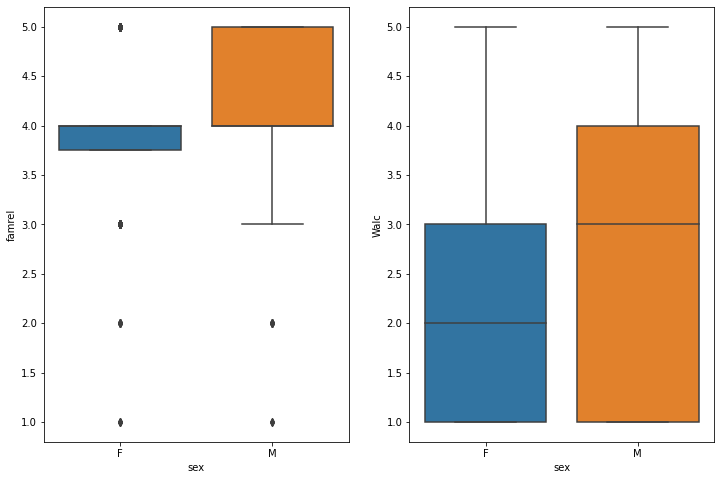

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(12,8))

sns.boxplot(x="sex", y="famrel", data=df, orient='v', ax=axes[0])
sns.boxplot(x="sex", y="Walc", data=df, orient='v', ax=axes[1])

#### Grouping data with 'male' because from graph above, looks like ‘male’ have more weekend alcohol consumption than female

In [50]:
df_group_one = df[['sex', 'famrel', 'Walc']]
df_group_one.groupby(['sex'], as_index=False).mean()

,sex,famrel,Walc
0,F,3.894231,1.956731
1,M,4.000000,2.663102


In [51]:
df_male = df[df['sex'] == "M"]
print(df_male.shape)
df_male.head()

(187, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15
12,GP,M,15,U,LE3,T,4,4,health,services,...,4,3,3,1,3,5,2,14,14,14


In [52]:
Percentage = (df_male.shape[0]/df.shape[0])*100
print('Male Percentage: ', round(Percentage), '%')

Male Percentage:  47 %


#### Compute DBSCAN

In [53]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler

Clus_dataSet = df_male[['age', 'famrel', 'Walc']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = np.array(Clus_dataSet, dtype=np.float64)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.5, min_samples=4).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df_male['Clus_Db']=labels

realClusterNum = len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

# A sample of clusters
print(df_male[['age', 'famrel', 'Walc', 'Clus_Db']].head())

# number of labels
print("number of labels: ", set(labels))

    age  famrel  Walc  Clus_Db
5    16       5     2        0
6    16       4     1        1
8    15       4     1        2
9    15       5     1        3
12   15       4     3       -1
number of labels:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, -1}


#### Visualize the data

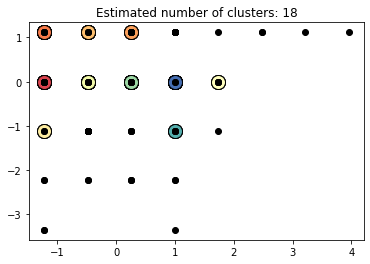

number of noise(s):  85


In [54]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
         for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
        
    class_member_mask = (labels == k)
    
    xy = Clus_dataSet[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
            markeredgecolor='k', markersize=14)
    
    xy = Clus_dataSet[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
            markeredgecolor='k', markersize=6)
    
plt.title('Estimated number of clusters: %d' % realClusterNum)
plt.show()

n_noise_ = list(labels).count(-1)
print('number of noise(s): ', n_noise_)

In [55]:
for clust_number in set(labels):
    clust_set = df_male[df_male.Clus_Db == clust_number]
    if clust_number != -1:
        print("Cluster " + str(clust_number) +', Avg Age: ' + str(round(np.mean(clust_set.age)))+\
              ', Avg Quality of family relationships: ' + str(round(np.mean(clust_set['famrel'])))+\
              ', Avg Weekend Alcohol Consumption: ' + str(round(np.mean(clust_set['Walc'])))+\
              ', Count: ' + str(np.count_nonzero(clust_set.index)))

Cluster 0, Avg Age: 16, Avg Quality of family relationships: 5, Avg Weekend Alcohol Consumption: 2, Count: 4
Cluster 1, Avg Age: 16, Avg Quality of family relationships: 4, Avg Weekend Alcohol Consumption: 1, Count: 8
Cluster 2, Avg Age: 15, Avg Quality of family relationships: 4, Avg Weekend Alcohol Consumption: 1, Count: 10
Cluster 3, Avg Age: 15, Avg Quality of family relationships: 5, Avg Weekend Alcohol Consumption: 1, Count: 10
Cluster 4, Avg Age: 15, Avg Quality of family relationships: 5, Avg Weekend Alcohol Consumption: 2, Count: 4
Cluster 5, Avg Age: 17, Avg Quality of family relationships: 5, Avg Weekend Alcohol Consumption: 4, Count: 5
Cluster 6, Avg Age: 16, Avg Quality of family relationships: 5, Avg Weekend Alcohol Consumption: 1, Count: 6
Cluster 7, Avg Age: 16, Avg Quality of family relationships: 4, Avg Weekend Alcohol Consumption: 5, Count: 4
Cluster 8, Avg Age: 15, Avg Quality of family relationships: 3, Avg Weekend Alcohol Consumption: 1, Count: 4
Cluster 9, Avg Ag

### Association Learning – Apriori Algorithm

#### Import second dataset

In [56]:
dataset = pd.read_csv('GroceryStoreDataSet.csv', names=['Products'])
data_list = [x.split(",") for x in list(dataset['Products'].values)]
data_list

[['MILK', 'BREAD', 'BISCUIT'],
 ['BREAD', 'MILK', 'BISCUIT', 'CORNFLAKES'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['JAM', 'MAGGI', 'BREAD', 'MILK'],
 ['MAGGI', 'TEA', 'BISCUIT'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['MAGGI', 'TEA', 'CORNFLAKES'],
 ['MAGGI', 'BREAD', 'TEA', 'BISCUIT'],
 ['JAM', 'MAGGI', 'BREAD', 'TEA'],
 ['BREAD', 'MILK'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'COCK'],
 ['BREAD', 'SUGER', 'BISCUIT'],
 ['COFFEE', 'SUGER', 'CORNFLAKES'],
 ['BREAD', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['TEA', 'MILK', 'COFFEE', 'CORNFLAKES']]

#### Transform the dataset into the right format via the TransactionEncoder

In [57]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(data_list).transform(data_list)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,True,False,True,False,False,False,False,False,True,False,False
1,True,False,True,False,False,True,False,False,True,False,False
2,False,True,True,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,True,True,True,False,False
4,True,False,False,False,False,False,False,True,False,False,True
5,False,True,True,False,False,False,False,False,False,False,True
6,False,False,False,False,False,True,False,True,False,False,True
7,True,False,True,False,False,False,False,True,False,False,True
8,False,False,True,False,False,False,True,True,False,False,True
9,False,False,True,False,False,False,False,False,True,False,False


#### Set the items and itemsets with at least 20% support

In [58]:
from mlxtend.frequent_patterns import apriori

apriori(df, min_support=0.2)

,support,itemsets
0,0.35,(0)
1,0.20,(1)
2,0.65,(2)
3,0.40,(4)
4,0.30,(5)
5,0.25,(7)
6,0.25,(8)
7,0.30,(9)
8,0.35,(10)
9,0.20,"(0, 2)"


#### For better readability, we can set use_colnames=True to convert these integer values into the respective item names

In [59]:
apriori(df, min_support=0.2, use_colnames=True)

,support,itemsets
0,0.35,(BISCUIT)
1,0.20,(BOURNVITA)
2,0.65,(BREAD)
3,0.40,(COFFEE)
4,0.30,(CORNFLAKES)
5,0.25,(MAGGI)
6,0.25,(MILK)
7,0.30,(SUGER)
8,0.35,(TEA)
9,0.20,"(BISCUIT, BREAD)"


#### Selecting and Filtering Result for the dataset
#### Create the frequent itemsets via apriori and add new columns that stores the length of each itemset

In [60]:
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.35,(BISCUIT),1
1,0.20,(BOURNVITA),1
2,0.65,(BREAD),1
3,0.40,(COFFEE),1
4,0.30,(CORNFLAKES),1
5,0.25,(MAGGI),1
6,0.25,(MILK),1
7,0.30,(SUGER),1
8,0.35,(TEA),1
9,0.20,"(BISCUIT, BREAD)",2


#### Select the results that satisfy our desired criteria

In [61]:
frequent_itemsets[ (frequent_itemsets['length'] == 1) &
                   (frequent_itemsets['support'] >= 0.6) ]

,support,itemsets,length
2,0.65,(BREAD),1


#### Select entries based on the itemsets

In [62]:
frequent_itemsets[ frequent_itemsets['itemsets'] == {'BISCUIT', 'BREAD'} ]

,support,itemsets,length
9,0.2,"(BISCUIT, BREAD)",2


### Association Learning – FP Growth Algorithm

#### Use the same dataset and import libraries

In [63]:
from mlxtend.frequent_patterns import fpgrowth

fpgrowth(df, min_support=0.2)

,support,itemsets
0,0.65,(2)
1,0.35,(0)
2,0.25,(8)
3,0.30,(5)
4,0.35,(10)
5,0.20,(1)
6,0.25,(7)
7,0.40,(4)
8,0.30,(9)
9,0.20,"(0, 2)"


#### For better readability, we can set use_colnames=True to convert these integer values into the respective item names

In [64]:
fpgrowth(df, min_support=0.2, use_colnames=True)

,support,itemsets
0,0.65,(BREAD)
1,0.35,(BISCUIT)
2,0.25,(MILK)
3,0.30,(CORNFLAKES)
4,0.35,(TEA)
5,0.20,(BOURNVITA)
6,0.25,(MAGGI)
7,0.40,(COFFEE)
8,0.30,(SUGER)
9,0.20,"(BISCUIT, BREAD)"


#### Apriori Vs FP Growth

In [65]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [66]:
from mlxtend.frequent_patterns import apriori

%timeit -n 100 -r 10 apriori(df, min_support=0.2)

1.12 ms ± 189 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


In [67]:
from mlxtend.frequent_patterns import fpgrowth

%timeit -n 100 -r 10 fpgrowth(df, min_support=0.2)

640 µs ± 115 µs per loop (mean ± std. dev. of 10 runs, 100 loops each)


### Kesimpulan
- DBSCAN, atau density-based spatial clustering of application with noise, adalah sebuah metode clustering berbasis density. Algoritma ini banyak digunakan pada data yang mengandung banyak noise. Hal ini dikarenakan DBSCAN cenderung memisahkan data yang mengandung noise agar tidak bercampur dengan cluster yang ada dalam data. Metode ini memiliki keunggulan berupa performa untuk menangkap cluster yang memiliki beragam bentuk. Namun sayangnya metode ini kurang cocok digunakan untuk data dengan tingkat kerapatan yang beragam atau data dengan dimensi yang terlalu besar.

- Berdasarkan hasil percobaan DBSCAN di atas, pada dataset pertama didapatkan hasil bahwa gender Male lebih banyak mengonsumsi alkohol pada weekend dibandingkan Female (Male adalah 2.663102 dan Female adalah 1.956731) dan persentase male adalah 47%. Kemudian dengan tightly setting yang dilakukan, didapatkan bahwa Cluster 7 dan Cluster 13 dengan rata-rata umur adalah 16 dan 17 merupakan rata-rata konsumsi alkohol pada weekend tertinggi dan juga rata-rata Quality of family relationships yang cukup tinggi.

- Algoritma Apriori merupakan salah satu algoritma unsupervised pada data mining, khususnya pada tugas asosiasi. Asosiasi adalah proses menyelidiki hubungan antara satu objek data dengan objek lainnya dalam dataset. Algoritma ini kebanyakan digunakan untuk analisis keranjang belanja dan membantu menemukan produk yang dapat dibeli bersama, atau di bidang perawatan Kesehatan untuk menemukan reaksi obat untuk pasien. Pada data mining, algoritma Apriori digunakan untuk menemukan data yang paling sering muncul dalam sebuah database. Item data transaksi pada database membentuk itemset. Itemset yang paling sering muncul dipilih oleh algoritma Apriori agar dapat digunakan untuk menentukan aturan asosiasi yang menyoroti tren umum dalam database. Algoritma lain yang juga pengembangan dari algoritma Apriori adalah algoritma FP-Growth (Frequent Pattern Growth). Dimana algoritma ini juga digunakan untuk menentukan himpunan data yang paling sering muncul, sama seperti Apriori. Namun algoritma FP-Growth menggunakan konsep pengembangan tree yang biasanya disebut FP-tree. Maka dari itu, algoritma FP-Growth menjadi lebih cepat daripada algoritma Apriori
- Pada dataset kedua didapatkan hasil bahwa FP Growth lebih cepat dibandingkan dengan Apriori. Hal ini karena FP Growth tidak memerlukan pembuatan set kandidat secara eksplisit.
- Apriori = 1.74 ms ± 488 µs per loop
- FP Growth = 936 µs ± 42.3 µs per loop

In [69]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 		Gempar Bambang Godata
NIM: 		00000056133
Time-stamp:	2023-05-14 20:27:10.221881


***

### Save the notebook, then convert the notebook to html (by running the next code).

!jupyter nbconvert --to html "./IF540L_Kelas_A_laporan_M11_00000067643_Gempar Bambang Godata.ipynb" --output-dir="./"

### Next step:
* convert the generated html file to PDF using the online tool: https://www.sejda.com/html-to-pdf
* choose the following settings:
    * Page size: One long page
    * Page Orientation: auto
    * Use print stylesheet
* Submit your ipython notebook and PDF files

Markdown basics https://markdown-guide.readthedocs.io/en/latest/basics.html#